# Represented population groups

This analysis aimed to answer the following research question: **Which African ethnolinguistic population groups are represented by the genetic data and what are the proportions of samples from Central, Southern, Eastern and Western Africa?**. A sample is defined as an individual from which genetic data was obtained.

To achieve this, the following steps were performed: 

1. Data Preparation: Population data for the samples was compiled and prepared for analysis according to the `Notebooks/Data preparation/1-Sample_populations.ipynb` Jupyter notebook. This Jupyter notebook also contains more information on the data. The compiled data is stored in `Data\Processed\Sample_populations.csv`.
2. Analysis and Visualisation: 
    * An initial, brief exploration of the sample population data was conducted.
    * Sample population data was grouped by ethnolinguistic classification and region. A bar plot was constructed to visualise the sample counts per population group. Additionally, the proportions of the data representing populations from Central, Southern, Eastern, and Western Africa regions were visualised using a pie chart.

## Imports

Notebook setup

In [69]:
import os
import sys

from dotenv import load_dotenv

load_dotenv()

PROJECT_ROOT = os.getenv("PROJECT_ROOT")
if PROJECT_ROOT not in sys.path:
    os.chdir(PROJECT_ROOT + "/Notebooks")
    sys.path.append(PROJECT_ROOT)

import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import Utils.constants as constants
import Utils.functions as functions

Import sample population data

In [70]:
sample_subpopulations = pd.read_csv(
    os.path.join(
        PROJECT_ROOT,
        "Data",
        "Processed",
        "Sample_populations.csv",
    )
).drop(columns="Unnamed: 0")

sample_subpopulations.tail(5)

,SUB,SAMPLE_NAME,REG
984,African American,NA20412,ASW
985,Mandenka,SS6004470,WA
986,Mbuti Pygmy,SS6004471,CA
987,San,SS6004473,SA
988,HGDP Yoruba,SS6004475,WA


## Data filtering

Remove African American and Caribbean samples

In [71]:
sample_subpopulations_filtered = sample_subpopulations[
    ~((sample_subpopulations.REG == "ACB") | (sample_subpopulations.REG == "ASW"))
]

## Data analysis and visualisation

### Data exploration
Are there any missing values?

In [88]:
sample_subpopulations_filtered.isnull().any()

SUB            False
SAMPLE_NAME    False
REG            False
dtype: bool

What are the number of samples?

In [83]:
sample_subpopulations_filtered["SAMPLE_NAME"].count()

804

Which subpopulation groups are present? 

In [86]:
sample_subpopulations_filtered["SUB"].unique()

array(['Mandinka', 'Esan', 'Mende', 'Mbuti Pygmy', 'Biaka Pygmy',
       'Mandenka', 'HGDP Yoruba', 'San', 'Bantu South Africa',
       'Bantu Kenya', '1000G Yoruba', 'Luhya'], dtype=object)

### Group data
Group data by sample ethnolinguistic classification (subpopulation) group

In [72]:
# Group data by sample subpopulation

grouped_sample_subpopulations = (
    functions.group_and_count(sample_subpopulations_filtered, ["SUB"])
    .reset_index()
    .rename(columns={"SAMPLE_NAME": "SAMPLE_COUNT"})
    .drop(columns="REG")
)

# Add regional information

grouped_sample_subpopulations["REG"] = grouped_sample_subpopulations["SUB"].map(
    constants.REGIONAL_CLASSIFICATION
)

# Combine 1000G Yoruba and HGDP Yoruba population counts into a single row called "Yoruba"

grouped_sample_subpopulations.loc[len(grouped_sample_subpopulations.index)] = [
    "Yoruba",
    grouped_sample_subpopulations.iloc[0, :]["SAMPLE_COUNT"]
    + grouped_sample_subpopulations.iloc[5, :]["SAMPLE_COUNT"],
    "WA",
]

# Drop 1000G Yoruba and HGDP Yoruba population counts

grouped_sample_subpopulations = grouped_sample_subpopulations.drop([0, 5])

grouped_sample_subpopulations

,SUB,SAMPLE_COUNT,REG
1,Bantu Kenya,12,EA
2,Bantu South Africa,8,SA
3,Biaka Pygmy,26,CA
4,Esan,148,WA
6,Luhya,97,EA
7,Mandenka,23,WA
8,Mandinka,176,WA
9,Mbuti Pygmy,14,CA
10,Mende,98,WA
11,San,6,SA


Group data by regional classification

In [73]:
grouped_regions = (
    grouped_sample_subpopulations.groupby("REG").sum(numeric_only=True).reset_index()
)
grouped_regions

,REG,SAMPLE_COUNT
0,CA,40
1,EA,109
2,SA,14
3,WA,641


### Data visualisation

Set plot parameters

In [74]:
sns.set(rc={"figure.figsize": (10, 8)}) # Set plot figure size

plt.rc("font", size=constants.MEDIUM_FONT)  # controls default text sizes
plt.rc("axes", titlesize=constants.MEDIUM_FONT)  # fontsize of the axes title
plt.rc("axes", labelsize=constants.BIGGER_FONT)  # fontsize of the x and y labels
plt.rc("xtick", labelsize=constants.MEDIUM_FONT)  # fontsize of the tick labels
plt.rc("ytick", labelsize=constants.MEDIUM_FONT)  # fontsize of the tick labels
plt.rc("legend", fontsize=constants.MEDIUM_FONT)  # legend fontsize
plt.rc("figure", titlesize=constants.BIGGER_FONT)  # fontsize of the figure title

Construct a horizontal barplot of sample counts per subpopulation, colour coded by regional classification

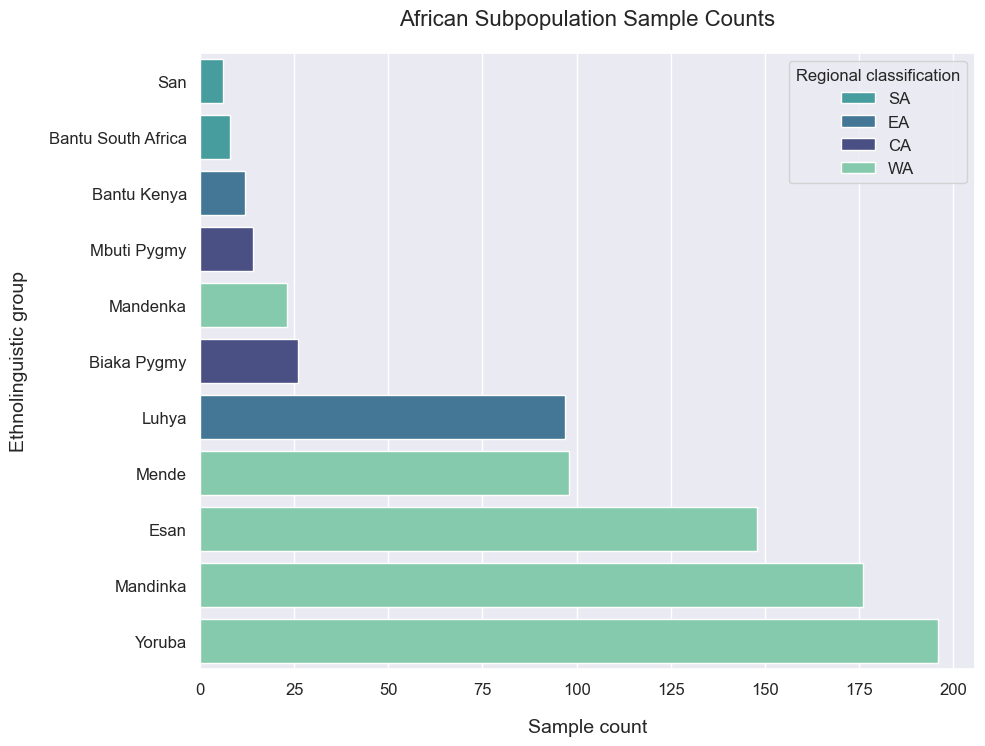

In [77]:
# Define a custom colour palette for plot
color_dict = dict({"SA": "#38AAAC", "EA": "#357BA3", "CA": "#40498E", "WA": "#79D6AE"})
values = grouped_sample_subpopulations_sort.REG.values

# Construct barplot
variant_barplot = functions.create_plot(
    plot_type="barplot",
    x="SAMPLE_COUNT",
    y="SUB",
    palette=color_dict,
    data=grouped_sample_subpopulations.sort_values("SAMPLE_COUNT"),
    hue="REG",
    order=grouped_sample_subpopulations.sort_values("SAMPLE_COUNT").SUB,
    dodge=False,
)

plt.xlabel(xlabel="Sample count", labelpad=15)
plt.ylabel(ylabel="Ethnolinguistic group", labelpad=15)
plt.legend(title="Regional classification", loc="upper right")
plt.title("African Subpopulation Sample Counts", size=constants.LARGEST_FONT, pad=20)

plt.savefig(
    "..\Results\Figures\Sample_population_counts.png", dpi=1200, bbox_inches="tight"
)
plt.show()

From the plot above we can see that the individuals from which genomic data was gathered were representative of 11 ethnolinguistic sub-population groups from Western Africa (WA), Southern Africa (SA), Eastern Africa (EA), and Central Africa (CA). The most genomic samples were taken from Yoruban and Gambian (GWD) sub-population groups.

Visualise the regional distribution of samples using a pie chart.

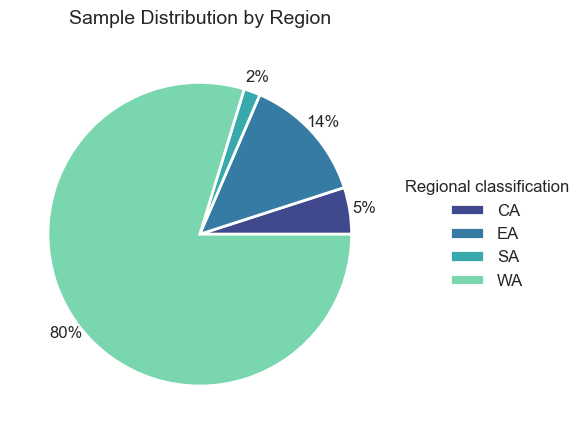

In [76]:
# Create pie chart of sample count per region
color_dict = dict({"SA": "#38AAAC", "EA": "#357BA3", "CA": "#40498E", "WA": "#79D6AE"})

values = grouped_regions.REG.values

fig, ax = plt.subplots(figsize=(6, 6))
patches, texts, pcts = plt.pie(
    data=grouped_regions,
    x="SAMPLE_COUNT",
    colors=[color_dict[key] for key in values],
    autopct="%.0f%%",
    wedgeprops={"linewidth": 2.0, "edgecolor": "white"},
    pctdistance=1.1,
    labeldistance=1.2,
)

ax.legend(
    patches,
    values,
    title="Regional classification",
    fontsize=12,
    frameon=False,
    loc="center left",
    bbox_to_anchor=(1, 0, 0.5, 1),
)

plt.title("Sample Distribution by Region", size=constants.BIGGER_FONT, pad=15)
plt.tight_layout()
plt.savefig(
    "..\Results\Figures\Sample_region_proportions.png", dpi=1200, bbox_inches="tight"
)
plt.show()

From the plot above, we can see that Southern Africa (SA) was under-represented in the African genomic data. The majority of the individuals from which genomic data was gathered were from Western Africa (WA).